<a href="https://colab.research.google.com/github/AftabUdaipurwala/PythonBasics/blob/main/Python_Pandas_Tutorial_14_Read_Write_Data_From_Database_(read_sql%2C_to_sql).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.1 MB/s 


In [2]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/pandas/14_ts_datetimeindex'
import pymysql
import sqlalchemy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
aapl.csv  pandas_ts_datetime_index.ipynb


In [8]:
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/14_ts_datetimeindex/aapl.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


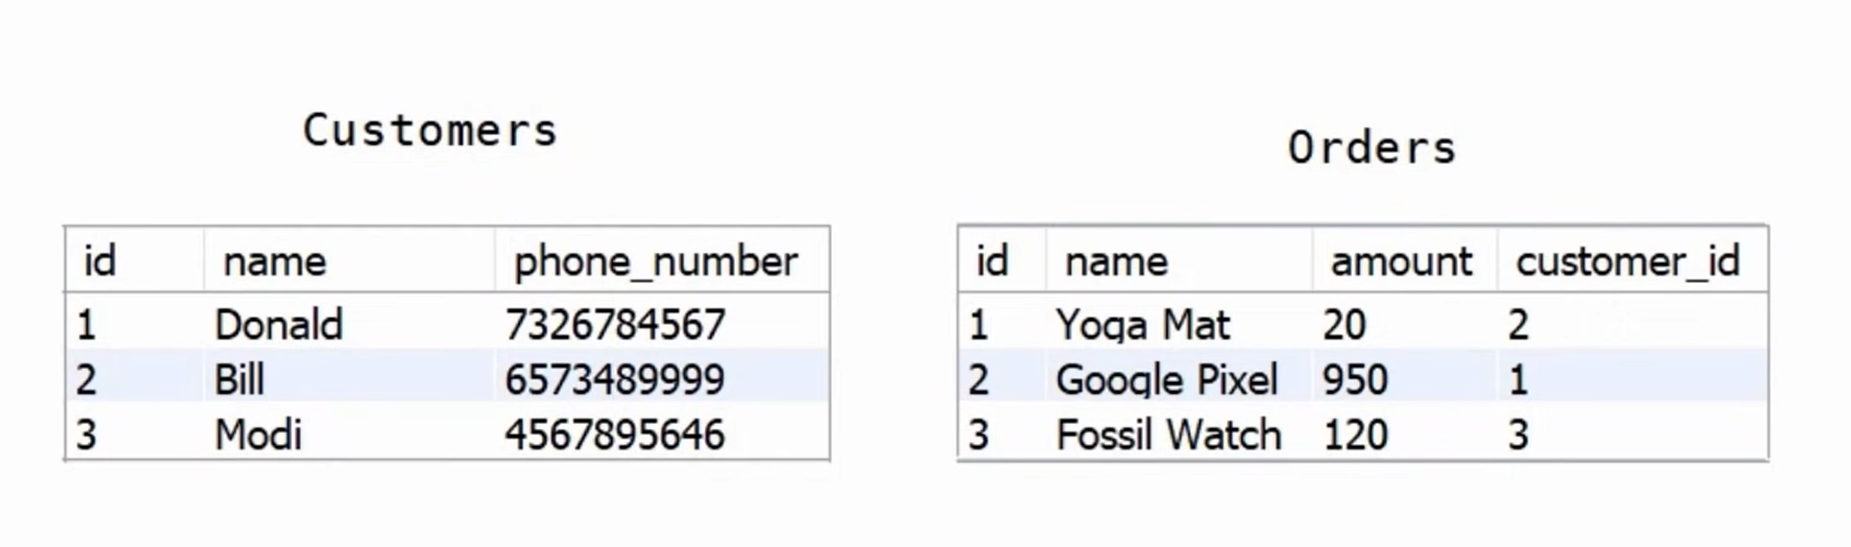

In [ ]:
# Creating a connection engine
engine = sqlalchemy.create_engine('mysql+pymysql//root:password@localhost:3306/application')


In [ ]:
# load data from table
df = pd.read_sql_table('customer', engine,columns =['name', 'phone'])
df

In [ ]:
# load data from SQL query
query = ''''
SELECT * FROM CUSTOMER, 
WHERE NAME LIKE A*
LIMIT 100
'''
df = pd.read_sql_query(query, engine)

In [ ]:
# writing data from dataframe to SQL
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/14_ts_datetimeindex/aapl.csv')
df.rename(columns ={
    'Date': 'dates'
}, inplace=True)

df.to_sql(name = customers, con =engine, index=False,if_exists='append') # if exist can be append, replace, fail , default value is fail
